# Image recognition with Convolutional Neural Network
CNNs provide an optimal architecture for uncovering and learning key features in image and time-series data.

## Dataset
### Context
The CIFAR-10 dataset consists of 60.000 32x32 colour images in 10 classes, with 6000 images per class.<br>
There are 50.000 training images and 10.000 test images.<br>
The dataset is divided into five training batches and one test batch, each with 10.000 images.<br>
The test batch contains exactly 1000 randomly-selected images from each class.<br>
The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another.<br>
Between them, the training batches contain exactly 5000 images from each class.<br>
The dataset consists of airplanes, dogs, cats, and other objects.
### Content
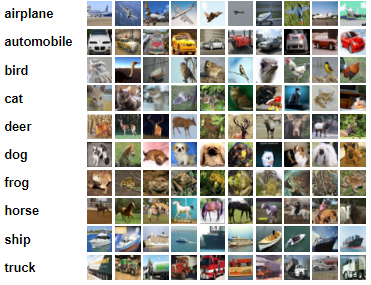<br>
The classes are completely mutually exclusive.<br>
There is no overlap between automobiles and trucks.<br>
"Automobile" includes sedans, SUVs, things of that sort.<br>
"Truck" includes only big trucks. Neither includes pickup trucks.

## What is a Convolutional Neural Network (CNN) ?

A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning that learns directly from data.<br>
CNNs are particularly useful for finding patterns in images to recognize objects, classes, and categories.<br>
They can also be quite effective for classifying audio, time-series, and signal data.<br>
A convolutional neural network can have tens or hundreds of layers that each learn to detect different features of an image.<br>
Filters are applied to each training image at different resolutions, and the output of each convolved image is used as the input to the next layer.<br>
The filters can start as very simple features, such as brightness and edges, and increase in complexity to features that uniquely define the object.<br>
<br>
A CNN is composed of an input layer, an output layer, and many hidden layers in between.<br><br>
These layers perform operations that alter the data with the intent of learning features specific to the data. Three of the most common layers are convolution, activation or ReLU, and pooling.<br>
<li><b>Convolution</b> puts the input images through a set of convolutional filters, each of which activates certain features from the images.</li>
<li><b>Rectified linear unit (ReLU)</b> allows for faster and more effective training by mapping negative values to zero and maintaining positive values. This is sometimes referred to as activation, because only the activated features are carried forward into the next layer.</li>
<li><b>Pooling</b> simplifies the output by performing nonlinear downsampling, reducing the number of parameters that the network needs to learn.
These operations are repeated over tens or hundreds of layers, with each layer learning to identify different features.</li>

These operations are repeated over tens or hundreds of layers, with each layer learning to identify different features.<br><br>
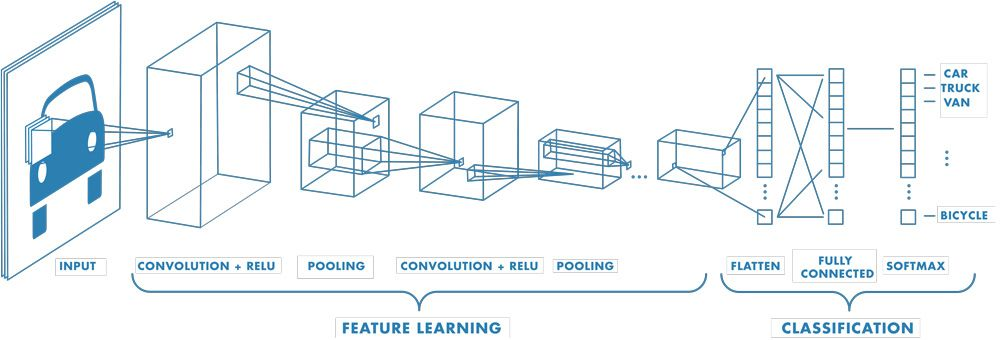<br>
Example of a network with many convolutional layers.<br>
Filters are applied to each training image at different resolutions, and the output of each convolved image is used as the input to the next layer.<br><br>
<b>Shared Weights and Biases</b>
Unlike a traditional neural network, a CNN has shared weights and bias values, which are the same for all hidden neurons in a given layer.<br>
This means that all hidden neurons are detecting the same feature, such as an edge or a blob, in different regions of the image.<br>
This makes the network tolerant to translation of objects in an image.<br>
For example, a network trained to recognize cars will be able to do so wherever the car is in the image.<br>
<br>
<b>Classification Layers</b>
After learning features in many layers, the architecture of a CNN shifts to classification.<br>
The next-to-last layer is a fully connected layer that outputs a vector of K dimensions (where K is the number of classes able to be predicted) and contains the probabilities for each class of an image being classified.<br>
The final layer of the CNN architecture uses a classification layer to provide the final classification output.<br>

CNNs are a key technology in applications such as:<br><br>
<b>Medical Imaging:</b> CNNs can examine thousands of pathology reports to visually detect the presence or absence of cancer cells in images.
<br><br>
<b>Audio Processing:</b> Keyword detection can be used in any device with a microphone to detect when a certain word or phrase is spoken (“Hey Siri!”). CNNs can accurately learn and detect the keyword while ignoring all other phrases regardless of the environment.
<br><br>
<b>Object Detection:</b>Automated driving relies on CNNs to accurately detect the presence of a sign or other object and make decisions based on the output.
<br><br>
<b>Synthetic Data Generation:</b> Using Generative Adversarial Networks (GANs), new images can be produced for use in deep learning applications including face recognition and automated driving.
<br><br>
Consider using CNNs when you have a large amount of complex data (such as image data). You can also use CNNs with signal or time-series data when preprocessed to work with the network structure.<br><br>
When working with CNNs, engineers and scientists prefer to initially start with a pretrained model and that can be used to learn and identify features from a new data set.<br><br>
The images need to be normalized and the labels need to be one-hot encoded (nominal encoding).

# Libraries

Please install the following dependencies using pip install:
<li>tensorflow</li>
<li>keras</li>

In [1]:
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# ML Data Engineering

In [2]:
# Load dataset.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

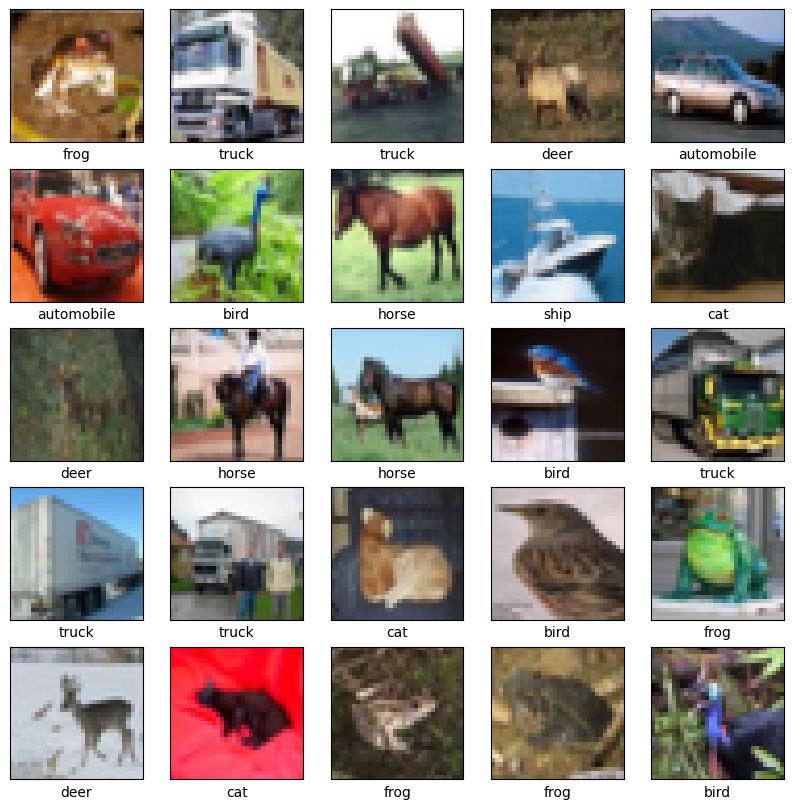

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

It is clear that the images are indeed very small compared to modern photographs; it can be challenging to see what exactly is represented in some of the images given the extremely low resolution.
<br>
This low resolution is likely the cause of the limited performance that top-of-the-line algorithms are able to achieve on the dataset.

## ML Model Engineering

In [5]:
# Create the convolutional base.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
# Add Dense layers to perform classification.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
# Display the architecture of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
# Compile and train the model.
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.5276 - accuracy: 0.4419 - val_loss: 1.3039 - val_accuracy: 0.5250
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1610 - accuracy: 0.5885 - val_loss: 1.1078 - val_accuracy: 0.6054
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0011 - accuracy: 0.6490 - val_loss: 0.9952 - val_accuracy: 0.6575
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9053 - accuracy: 0.6829 - val_loss: 0.9640 - val_accuracy: 0.6611
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8364 - accuracy: 0.7075 - val_loss: 0.9079 - val_accuracy: 0.6847
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7814 - accuracy: 0.7275 - val_loss: 0.8650 - val_accuracy: 0.7012
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7334 - accuracy: 0.7424 - val_loss: 0.8570 -

## ML Model Evaluation

313/313 - 3s - loss: 0.8921 - accuracy: 0.7095 - 3s/epoch - 10ms/step


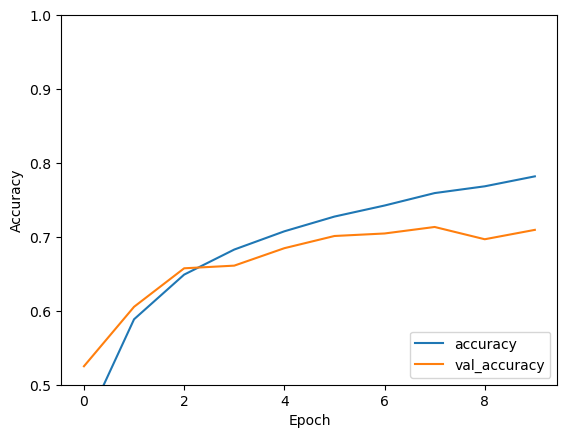

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

 This simple CNN has achieved a test accuracy of about 70%.

## References

https://chat.openai.com/<br>
https://www.cs.toronto.edu/~kriz/cifar.html<br>
https://github.com/ltpitt/python-jupyter-image-classification<br>
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/<br>
https://www.tensorflow.org/tutorials/images/cnn